In [1]:
import pandas as pd
import  numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#lets separate the title from the name 
x=list(df['Name'])
z=[]
for i in x:
  z.append(i.split(sep=',')[0])
df['title']=z
df.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [90]:
df['Cabin'].fillna('missing_values',inplace=True)#fill nan values with a string"missing value"

In [91]:
df['bin_cabin']=[0 if i =='missing_values' else 1 for i in df['Cabin']]#people who have a cabin will give them 1 else 0

In [92]:
df['bin_cabin'].value_counts()#people who have  cabin are less than those who havent

0    687
1    204
Name: bin_cabin, dtype: int64

In [7]:
df['title'].value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: title, Length: 667, dtype: int64

In [8]:
df['Age'].fillna(0,inplace=True)#fill nan age values with 0 to keep the column in one dtype which is float

In [9]:
#lets lable the age of people to yound,old&veryold there age range(1,20,40,100) to help to visiualize the data
age=[]
for i in df['Age']:
  if i in range(1,20):
    age.append('young')
  elif i in range(20,40):
    age.append('old')
  elif i in range(40,100):
    age.append('very_old')  
  else:
    age.append('missing')
df['labeled_age']=age      

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing_values,S,Braund,0,old
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1,old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing_values,S,Heikkinen,0,old
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,1,old
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing_values,S,Allen,0,old


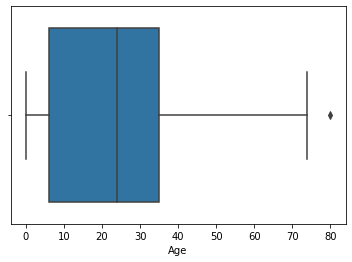

In [11]:
sns.boxplot(x='Age',data=df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    object 
 13  bin_cabin    891 non-null    int64  
 14  labeled_age  891 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
title          0
bin_cabin      0
labeled_age    0
dtype: int64

In [104]:
df['Embarked'].fillna("nan",inplace=True)
df[df['Embarked']=='nan']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,nan,Icard,1,old
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,nan,Stone,1,very_old


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,bin_cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [15]:
df.duplicated().value_counts()

False    891
dtype: int64

[Text(0.5, 1.0, 'Age')]

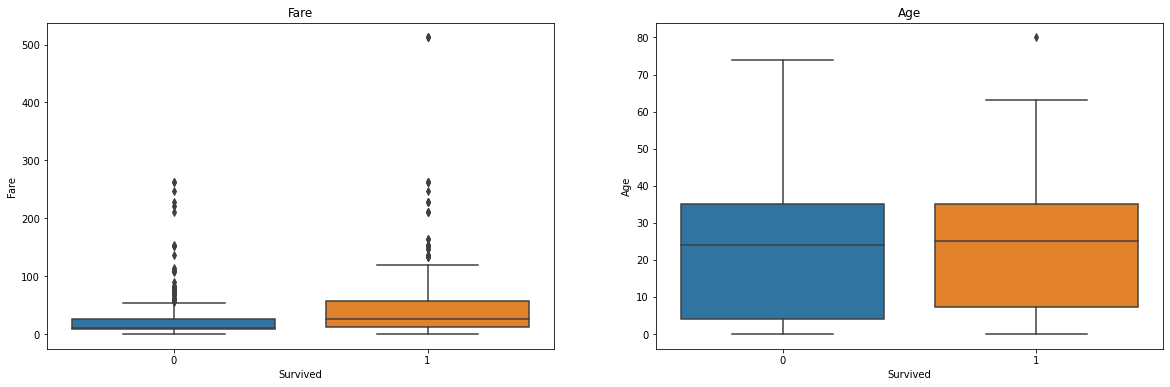

In [106]:
#people who had more fare had more chance to survive
fig,axes=plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x='Survived',y='Fare',data=df,ax=axes[0]).set(title='Fare')
sns.boxplot(x='Survived',y='Age',data=df,ax=axes[1]).set(title='Age')


In [17]:
df[df['Fare']>350]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,missing_values,C,Ward,0,old
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza,1,old
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer,1,old


In [18]:
df[(df['Age']>55) & (df['Survived']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell,1,very_old
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,Lurette,1,very_old
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,Graham,1,very_old
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,Andrews,1,very_old
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,Warren,1,very_old
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,missing_values,S,Turkula,0,very_old
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,missing_values,S,Harris,0,very_old
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,Frolicher-Stehli,1,very_old
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Barkworth,1,very_old
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,Simonius-Blumer,1,very_old


In [107]:
df[(df['Age']>55) & (df['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,missing_values,S,Wheadon,0,very_old
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,Ostby,1,very_old
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,missing_values,S,Coxon,0,very_old
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Goldschmidt,1,very_old
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,missing_values,Q,Connors,0,missing
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,missing_values,S,Meo,0,missing
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,Van der hoef,1,very_old
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,Smith,1,very_old
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,missing_values,S,Sjostedt,0,very_old
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,Stead,1,very_old


[Text(0.5, 1.0, 'class distribution')]

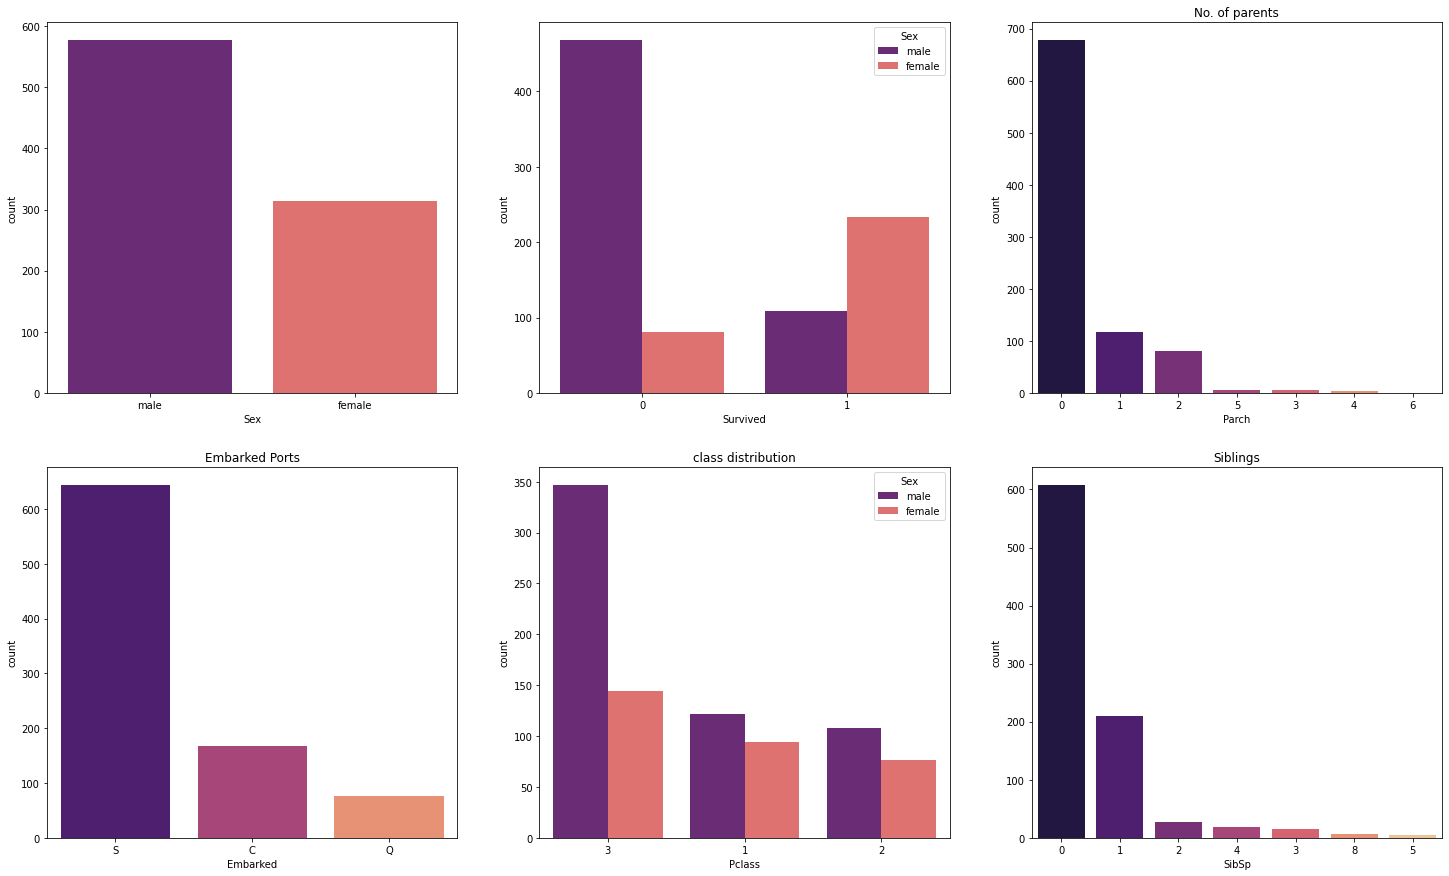

In [19]:
fig,axes=plt.subplots(2,3,figsize=(25,15))
sns.countplot(x='Sex',data=df,palette='magma',order=df['Sex'].value_counts().sort_values(ascending=False).index,ax=axes[0,0])
sns.countplot(x=df['Survived'],hue=df['Sex'],palette='magma',ax=axes[0,1])
sns.countplot(x='SibSp',data=df,order=df['SibSp'].value_counts().sort_values(ascending=False).index,palette='magma',ax=axes[1,2]).set(title='Siblings')
sns.countplot(x='Parch',data=df,order=df['Parch'].value_counts().sort_values(ascending=False).index,palette='magma',ax=axes[0,2]).set(title='No. of parents')
sns.countplot(x='Embarked',order=df['Embarked'].value_counts().sort_values(ascending=False).index,palette='magma',data=df,ax=axes[1,0]).set(title='Embarked Ports')
sns.countplot(x='Pclass',order=df['Pclass'].value_counts().sort_values(ascending=False).index,palette='magma',data=df,hue='Sex',ax=axes[1,1]).set(title='class distribution')
#males were more than females also number of female survived were more than males priority were to femals
#0 parents were the highest count then 1,2
#0 siblings were the highest then 1,2
#most of trips embarked from "S" Southpaw then 'C' then "Q"
#most of the trips were 3rd class then 1st,2nd and number of males in each class is more than females

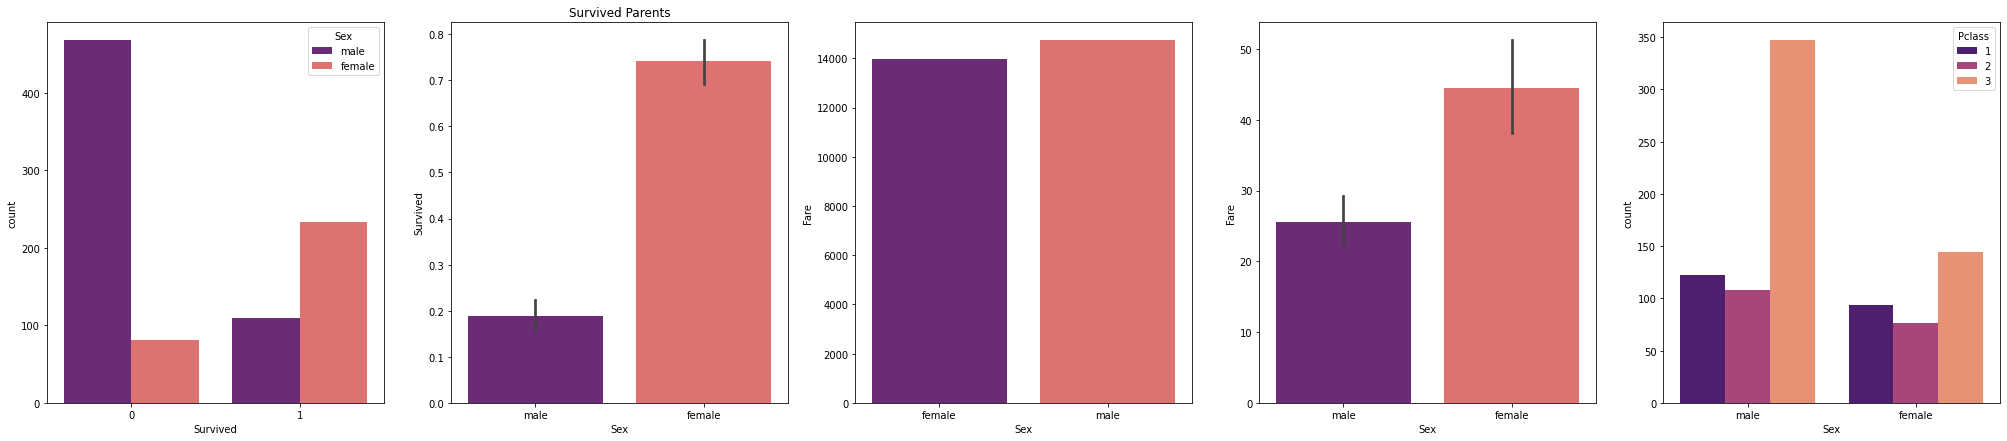

In [20]:
fig,ax=plt.subplots(1,5,figsize=(35,7))
sns.countplot(x=df['Survived'],hue=df['Sex'],ax=ax[0],palette='magma')
sns.barplot(x='Sex',y='Survived',palette='magma',data=df,ax=ax[1]).set(title='Survived Parents')##
sns.barplot(x=df.groupby('Sex')['Fare'].sum().index,y=df.groupby('Sex')['Fare'].sum(),ax=ax[2],palette='magma')
sns.barplot(x=df['Sex'],y=df['Fare'],ax=ax[3],palette='magma')
sns.countplot(x=df['Sex'],hue=df['Pclass'],palette='magma',ax=ax[4])
#female had the piriorty to surrvive and more chance than men
#most of the 3rd class trips were booked by men
#1st class has more male than female

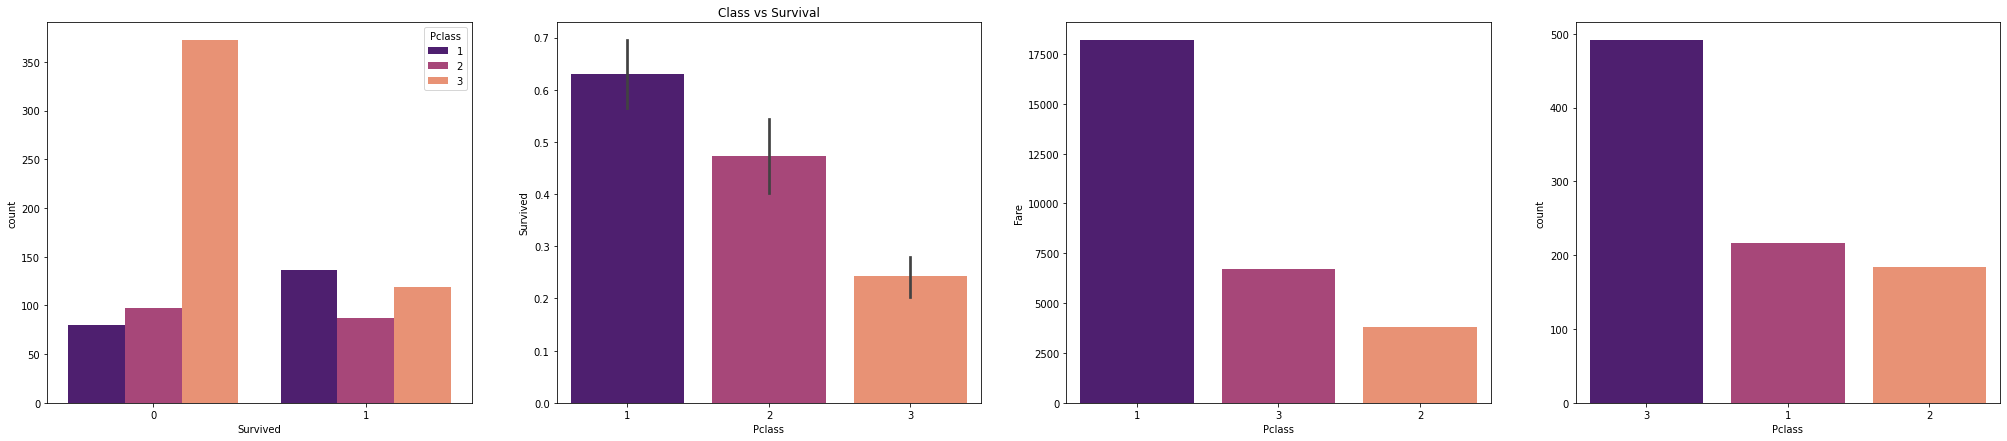

In [21]:
fig,ax=plt.subplots(1,4,figsize=(35,7))
sns.countplot(x=df['Survived'],hue=df['Pclass'],ax=ax[0],palette='magma')
sns.barplot(x='Pclass',y='Survived',order=df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False).index,palette='magma',data=df,ax=ax[1]).set(title='Class vs Survival')
sns.barplot(x=df.groupby('Pclass')['Fare'].sum().index,y=df.groupby('Pclass')['Fare'].sum(),order=df.groupby('Pclass')['Fare'].sum().sort_values(ascending=False).index,ax=ax[2],palette='magma')
sns.countplot(x=df['Pclass'],ax=ax[3],palette='magma',order=df['Pclass'].value_counts().sort_values(ascending=False).index)
#1st class people had more chance of survival then second class then 3rd class
#most of the trips were 3rd class
#3rd class was the cheapest ticket
#most of the people who didnt survive were 3rd class then 2nd class ,1st class

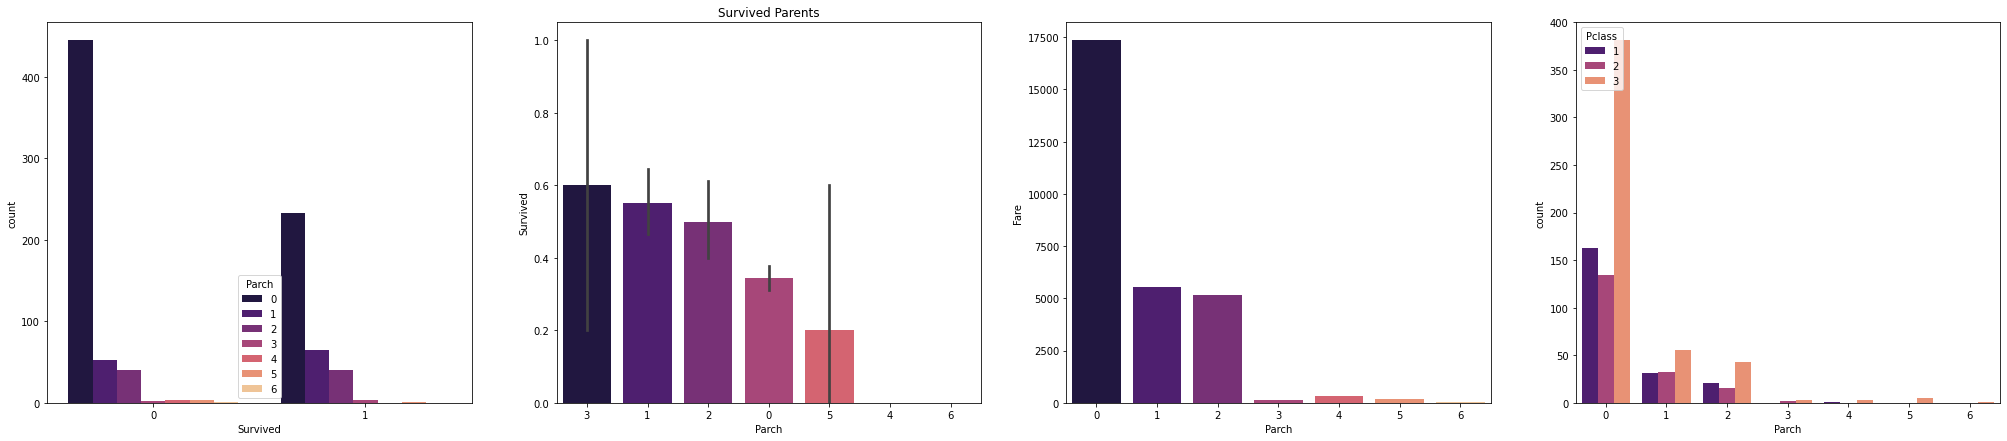

In [22]:
fig,ax=plt.subplots(1,4,figsize=(35,7))
sns.countplot(x=df['Survived'],hue=df['Parch'],ax=ax[0],palette='magma')
sns.barplot(x='Parch',y='Survived',order=df.groupby('Parch')['Survived'].mean().sort_values(ascending=False).index,palette='magma',data=df,ax=ax[1]).set(title='Survived Parents')##
sns.barplot(x=df.groupby('Parch')['Fare'].sum().index,y=df.groupby('Parch')['Fare'].sum(),ax=ax[2],palette='magma')
sns.countplot(x=df['Parch'],hue=df['Pclass'],palette='magma',ax=ax[3])
#people with 1,2 parch had more cahnce of survival as we see 0 parch number of people who died were double the number of peoplee survived

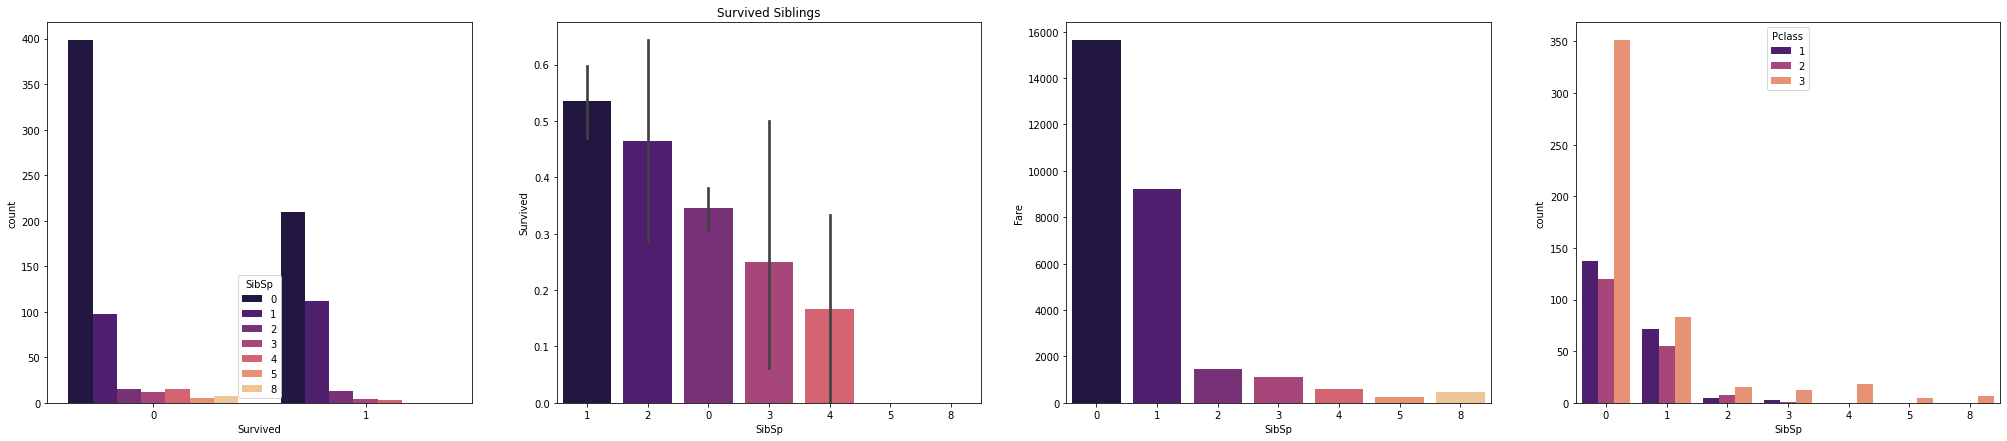

In [23]:
fig,ax=plt.subplots(1,4,figsize=(35,7))
sns.countplot(x=df['Survived'],hue=df['SibSp'],ax=ax[0],palette='magma')
sns.barplot(x='SibSp',y='Survived',order=df.groupby('SibSp')['Survived'].mean().sort_values(ascending=False).index,palette='magma',data=df,ax=ax[1]).set(title='Survived Siblings')
sns.barplot(x=df.groupby('SibSp')['Fare'].sum().index,y=df.groupby('SibSp')['Fare'].sum(),ax=ax[2],palette='magma')
sns.countplot(x=df['SibSp'],hue=df['Pclass'],palette='magma',ax=ax[3])
#people with 1 sibling had more chance to survive then 2,0
#number of poeple had no siblings and died is double the number which survived 

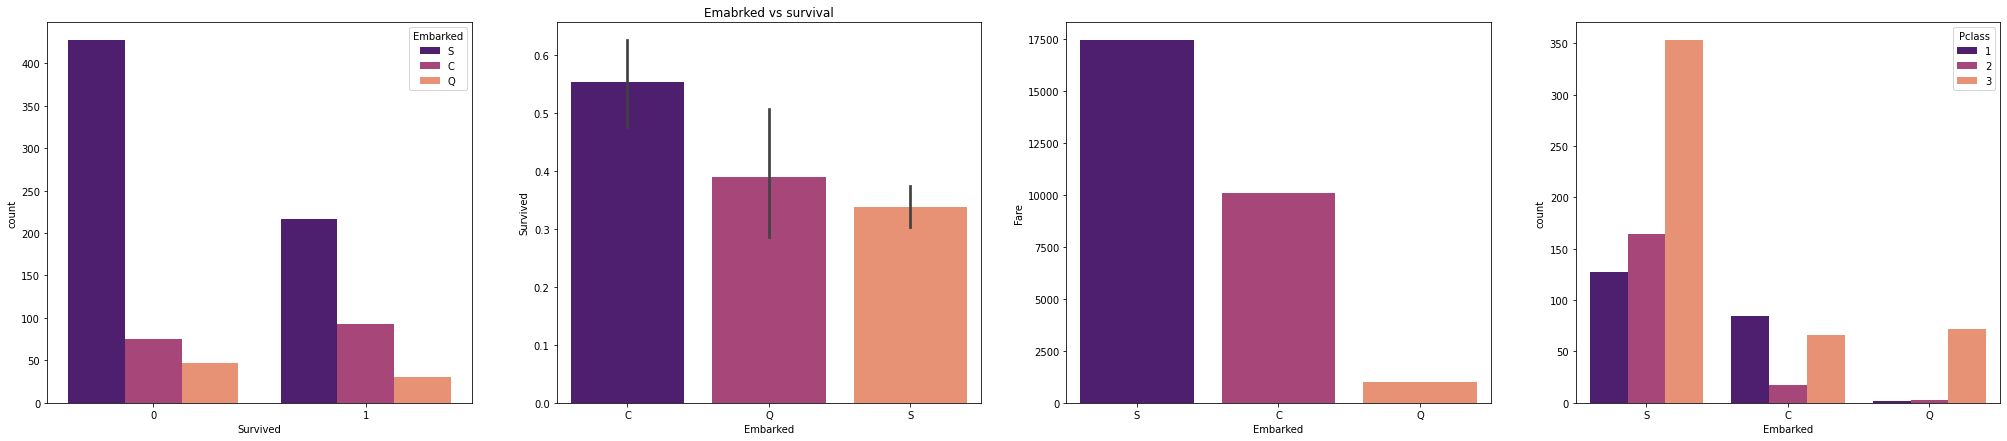

In [24]:
fig,ax=plt.subplots(1,4,figsize=(35,7))
sns.countplot(x=df['Survived'],hue=df['Embarked'],ax=ax[0],palette='magma')
sns.barplot(x='Embarked',y='Survived',order=df.groupby('Embarked')['Survived'].mean().sort_values(ascending=False).index,palette='magma',data=df,ax=ax[1]).set(title='Emabrked vs survival')
sns.barplot(x=df.groupby('Embarked')['Fare'].sum().index,y=df.groupby('Embarked')['Fare'].sum(),order=df.groupby('Embarked')['Fare'].sum().sort_values(ascending=False).index,ax=ax[2],palette='magma')
sns.countplot(x=df['Embarked'],hue=df['Pclass'],palette='magma',ax=ax[3])
#trips embarked from "C" tend to survive more than "Q","S"

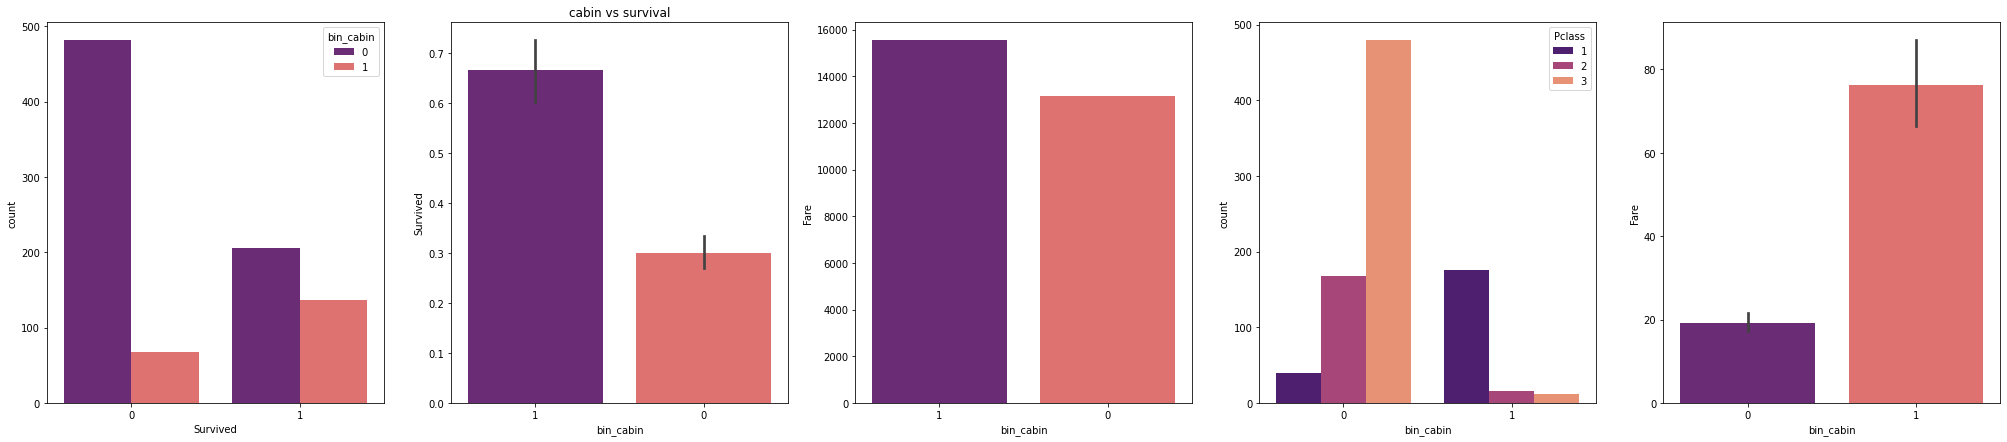

In [25]:
fig,ax=plt.subplots(1,5,figsize=(35,7))
sns.countplot(x=df['Survived'],hue=df['bin_cabin'],ax=ax[0],palette='magma')
sns.barplot(x='bin_cabin',y='Survived',order=df.groupby('bin_cabin')['Survived'].mean().sort_values(ascending=False).index,palette='magma',data=df,ax=ax[1]).set(title='cabin vs survival')
sns.barplot(x=df.groupby('bin_cabin')['Fare'].sum().index,y=df.groupby('bin_cabin')['Fare'].sum(),order=df.groupby('bin_cabin')['Fare'].sum().sort_values(ascending=False).index,ax=ax[2],palette='magma')
sns.countplot(x=df['bin_cabin'],hue=df['Pclass'],palette='magma',ax=ax[3])
sns.barplot(x=df['bin_cabin'],y=df['Fare'],ax=ax[4],palette='magma')
#peple who had cabin survived more than other people who dont
#Trips booked with a cabin were expensive and most of them was 1st class 

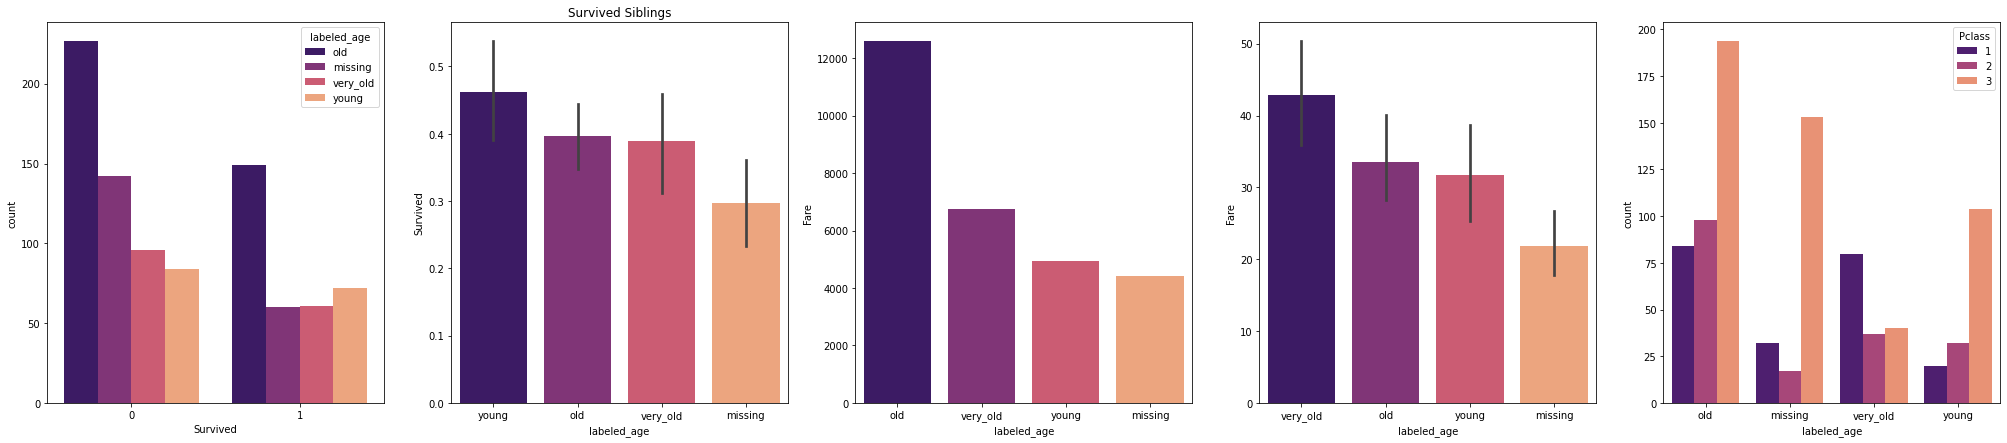

In [26]:
fig,ax=plt.subplots(1,5,figsize=(35,7))
sns.countplot(x=df['Survived'],hue=df['labeled_age'],ax=ax[0],palette='magma')
sns.barplot(x='labeled_age',y='Survived',order=df.groupby('labeled_age')['Survived'].mean().sort_values(ascending=False).index,palette='magma',data=df,ax=ax[1]).set(title='Survived Siblings')
sns.barplot(x=df.groupby('labeled_age')['Fare'].sum().index,y=df.groupby('labeled_age')['Fare'].sum(),order=df.groupby('labeled_age')['Fare'].sum().sort_values(ascending=False).index,ax=ax[2],palette='magma')
sns.barplot(x=df['labeled_age'],y=df['Fare'],ax=ax[3],order=df.groupby('labeled_age')['Fare'].mean().sort_values(ascending=False).index,palette='magma')
sns.countplot(x=df['labeled_age'],hue=df['Pclass'],palette='magma',ax=ax[4])
#young people survived more than other old people
#people with missing age record tend to have very low prob to survive and most of there tickets were 3rd class 

In [116]:
df[(df['labeled_age']=='missing')&(df['Pclass']==3)]['Survived'].value_counts()

0    116
1     37
Name: Survived, dtype: int64

In [117]:
df[(df['labeled_age']=='missing')&(df['Pclass']==1)]['Survived'].value_counts()

0    17
1    15
Name: Survived, dtype: int64

In [119]:
df[(df['labeled_age']=='missing')&(df['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,0.00,1,0,PC 17569,146.5208,B78,C,Spencer,1,missing
55,56,1,1,"Woolner, Mr. Hugh",male,0.00,0,0,19947,35.5000,C52,S,Woolner,1,missing
64,65,0,1,"Stewart, Mr. Albert A",male,0.00,0,0,PC 17605,27.7208,missing_values,C,Stewart,0,missing
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,0.00,0,1,113505,55.0000,E33,S,Chibnall,1,missing
168,169,0,1,"Baumann, Mr. John D",male,0.00,0,0,PC 17318,25.9250,missing_values,S,Baumann,0,missing
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,0.00,0,0,113767,50.0000,A32,S,Rood,1,missing
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,0.00,0,0,PC 17585,79.2000,missing_values,C,Thorne,0,missing
270,271,0,1,"Cairns, Mr. Alexander",male,0.00,0,0,113798,31.0000,missing_values,S,Cairns,0,missing
284,285,0,1,"Smith, Mr. Richard William",male,0.00,0,0,113056,26.0000,A19,S,Smith,1,missing
295,296,0,1,"Lewy, Mr. Ervin G",male,0.00,0,0,PC 17612,27.7208,missing_values,C,Lewy,0,missing


In [112]:
df.groupby(df['labeled_age'])['Pclass'].value_counts()

labeled_age  Pclass
missing      3         153
             1          32
             2          17
old          3         194
             2          98
             1          84
very_old     1          80
             3          40
             2          37
young        3         104
             2          32
             1          20
Name: Pclass, dtype: int64

In [27]:
df.groupby('Parch')['Survived'].value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [28]:
df.groupby('Pclass')['Embarked'].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [29]:
df.groupby('Parch')['Fare'].sum()

Parch
0    17347.8325
1     5519.8252
2     5147.0083
3      129.7583
4      339.8750
5      162.7500
6       46.9000
Name: Fare, dtype: float64

In [30]:
df.groupby('Parch')['Fare'].mean()

Parch
0    25.586774
1    46.778180
2    64.337604
3    25.951660
4    84.968750
5    32.550000
6    46.900000
Name: Fare, dtype: float64

In [31]:
data=df

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=df.apply(le.fit_transform)


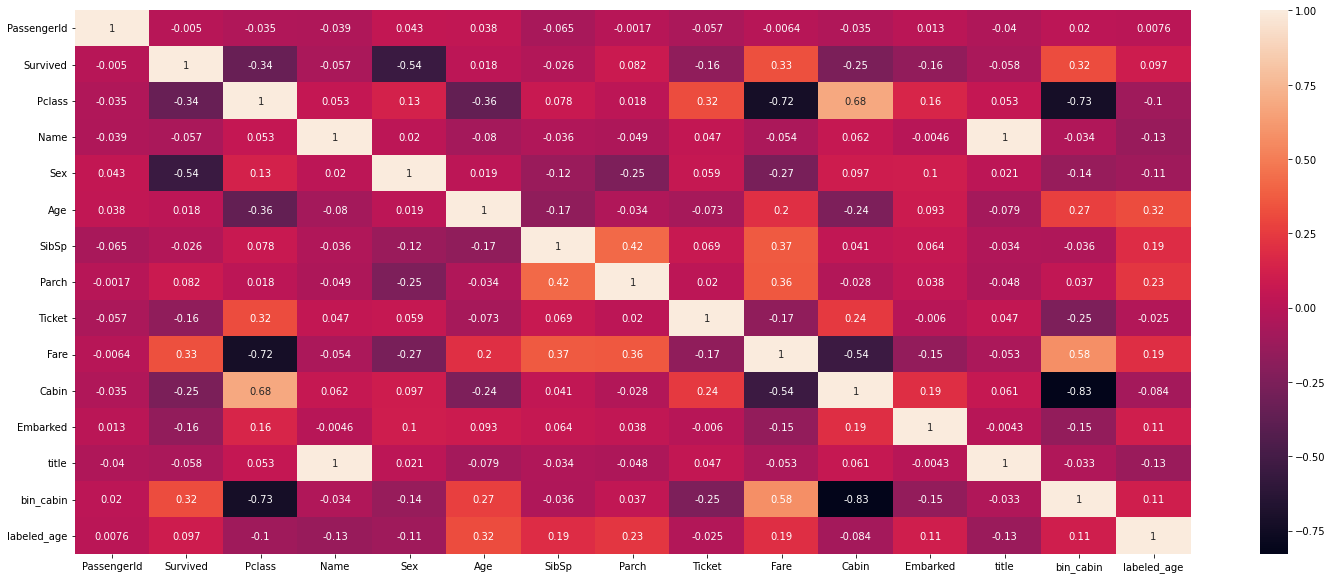

In [33]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True)

In [34]:
df['Ticket'].value_counts().head(10)

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: Ticket, dtype: int64

In [35]:
df[df['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,missing_values,S,Andersson,0,old
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,missing_values,S,Andersson,0,young
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,missing_values,S,Andersson,0,young
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,missing_values,S,Andersson,0,young
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,missing_values,S,Andersson,0,old
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,missing_values,S,Andersson,0,young
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,missing_values,S,Andersson,0,young


In [36]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
159,160,0,3,"Sage, Master. Thomas Henry",male,0.0,8,2,CA. 2343,69.55,missing_values,S,Sage,0,missing
180,181,0,3,"Sage, Miss. Constance Gladys",female,0.0,8,2,CA. 2343,69.55,missing_values,S,Sage,0,missing
201,202,0,3,"Sage, Mr. Frederick",male,0.0,8,2,CA. 2343,69.55,missing_values,S,Sage,0,missing
324,325,0,3,"Sage, Mr. George John Jr",male,0.0,8,2,CA. 2343,69.55,missing_values,S,Sage,0,missing
792,793,0,3,"Sage, Miss. Stella Anna",female,0.0,8,2,CA. 2343,69.55,missing_values,S,Sage,0,missing
846,847,0,3,"Sage, Mr. Douglas Bullen",male,0.0,8,2,CA. 2343,69.55,missing_values,S,Sage,0,missing
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,0.0,8,2,CA. 2343,69.55,missing_values,S,Sage,0,missing


In [37]:
df[df['Ticket']=='1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,missing_values,S,Bing,0,old
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,missing_values,S,Ling,0,old
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,missing_values,S,Lang,0,old
643,644,1,3,"Foo, Mr. Choong",male,0.0,0,0,1601,56.4958,missing_values,S,Foo,0,missing
692,693,1,3,"Lam, Mr. Ali",male,0.0,0,0,1601,56.4958,missing_values,S,Lam,0,missing
826,827,0,3,"Lam, Mr. Len",male,0.0,0,0,1601,56.4958,missing_values,S,Lam,0,missing
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,missing_values,S,Chip,0,old


In [38]:
df['Cabin'].value_counts()
df[df['Cabin']=='G6']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,bin_cabin,labeled_age
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,1,young
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,Strom,1,young
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,Strom,1,old
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Sandstrom,1,old


In [39]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=54)

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [42]:
y_pred_log=log_reg.predict(x_test)

In [43]:
from sklearn.metrics import classification_report
class_report=classification_report(y_test,y_pred_log)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       112
           1       0.70      0.69      0.69        67

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [44]:
from sklearn import metrics

accuracy  = metrics.accuracy_score(y_test,y_pred_log)

recall = metrics.recall_score(y_test,y_pred_log)

precision = metrics.precision_score(y_test,y_pred_log)

f1_score = metrics.f1_score(y_test,y_pred_log)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 77.1 %
Model recall = 68.7 %
Model precision = 69.7 %
Model f1_score = 69.2 %


[[92 20]
 [21 46]]


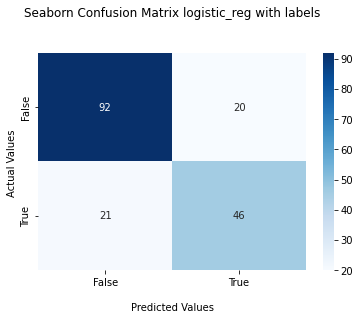

In [46]:
from sklearn.metrics import confusion_matrix

cf_matrix_log = confusion_matrix(y_test,y_pred_log)


print(cf_matrix_log)

import seaborn as sns

ax = sns.heatmap(cf_matrix_log, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix logistic_reg with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid_knn={'n_neighbors':[5,15,25,50,100],
                'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                'weights':['uniform','distance']
    
}

In [49]:
knn=KNeighborsClassifier()
g_search_knn=GridSearchCV(estimator=knn,param_grid=param_grid_knn,cv=5)
g_search_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 15, 25, 50, 100],
                         'weights': ['uniform', 'distance']})

In [50]:
print(g_search_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}


In [53]:
knn_2=KNeighborsClassifier(n_neighbors=15)
knn_2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [55]:
y_pred_knn=knn_2.predict(x_test)
class_report = classification_report(y_test,y_pred_knn)

print(class_report)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       112
           1       0.68      0.42      0.52        67

    accuracy                           0.71       179
   macro avg       0.70      0.65      0.66       179
weighted avg       0.70      0.71      0.69       179



In [56]:
from sklearn import metrics

accuracy  = metrics.accuracy_score(y_test,y_pred_knn)

recall = metrics.recall_score(y_test,y_pred_knn)

precision = metrics.precision_score(y_test,y_pred_knn)

f1_score = metrics.f1_score(y_test,y_pred_knn)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 70.9 %
Model recall = 41.8 %
Model precision = 68.3 %
Model f1_score = 51.9 %


In [54]:
#Model Accuracy = 68.7 %
#Model recall = 34.3 %
#Model precision = 65.7 %
#Model f1_score = 45.1 %

[[99 13]
 [39 28]]


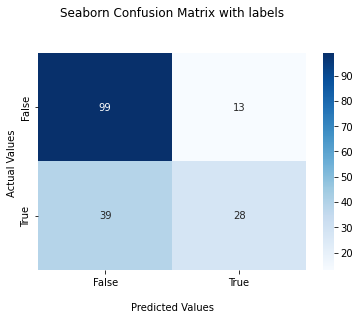

In [57]:
from sklearn.metrics import confusion_matrix

cf_matrix_knn = confusion_matrix(y_test,y_pred_knn)


print(cf_matrix_knn)

import seaborn as sns

ax = sns.heatmap(cf_matrix_knn, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'max_iter':[10,50,100,200,500,-1,1000,2000],
            'probability':[False,True]
    
}

In [ ]:
svm_model1=svm.SVC()
g_search=GridSearchCV(estimator=svm_model1,param_grid=param_grid,cv=5)
g_search.fit(x_train,y_train)

In [ ]:
print(g_search.best_params_)

{'kernel': 'linear', 'max_iter': -1, 'probability': False}


In [58]:
from sklearn import svm
svm_model=svm.SVC(kernel='linear',probability=False)
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [59]:
y_pred_svm=svm_model.predict(x_test)

In [60]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       112
           1       0.72      0.69      0.70        67

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [61]:
from sklearn import metrics

accuracy  = metrics.accuracy_score(y_test,y_pred_svm)

recall = metrics.recall_score(y_test,y_pred_svm)

precision = metrics.precision_score(y_test,y_pred_svm)

f1_score = metrics.f1_score(y_test,y_pred_svm)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 78.2 %
Model recall = 68.7 %
Model precision = 71.9 %
Model f1_score = 70.2 %


[[94 18]
 [21 46]]


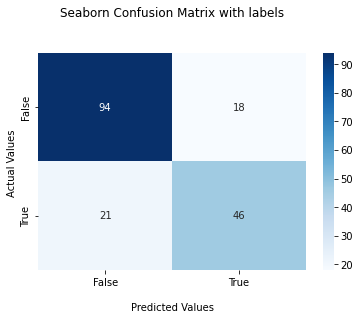

In [62]:
from sklearn.metrics import confusion_matrix

cf_matrix_svm = confusion_matrix(y_test,y_pred_svm)


print(cf_matrix_svm)

import seaborn as sns

ax = sns.heatmap(cf_matrix_svm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [63]:
param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [64]:
from sklearn.ensemble import RandomForestClassifier
##
rfc_search=RandomForestClassifier(random_state=42)
g_search_rf=GridSearchCV(estimator=rfc_search,param_grid=param_grid_rf,cv=5)
g_search_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [69]:
print(g_search_rf.best_estimator_)
#RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)


In [70]:
rf=RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [71]:
y_pred_rf=rf.predict(x_test)

In [72]:
accuracy  = metrics.accuracy_score(y_test,y_pred_rf)

recall = metrics.recall_score(y_test,y_pred_rf)

precision = metrics.precision_score(y_test,y_pred_rf)

f1_score = metrics.f1_score(y_test,y_pred_rf)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )
#Model Accuracy = 82.1 %
#Model recall = 79.1 %
#Model precision = 74.6 %
#Model f1_score = 76.8 %

Model Accuracy = 82.1 %
Model recall = 76.1 %
Model precision = 76.1 %
Model f1_score = 76.1 %


In [73]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       112
           1       0.76      0.76      0.76        67

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



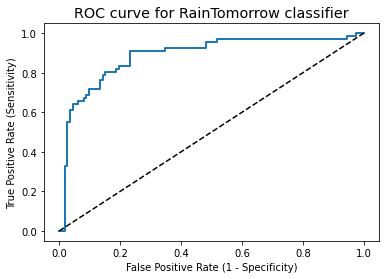

In [175]:
from sklearn.metrics import roc_curve
y_pred_proba = rf.predict_proba(x_test)[::,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

[[96 16]
 [16 51]]


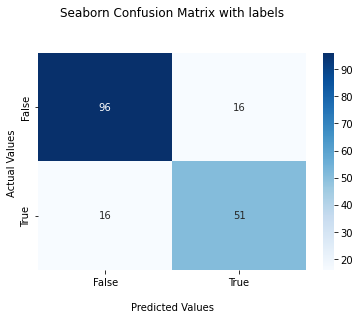

In [74]:
cf_matrix_rf = confusion_matrix(y_test,y_pred_rf)


print(cf_matrix_rf)

import seaborn as sns

ax = sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [75]:
col=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'bin_cabin',
       'labeled_age']

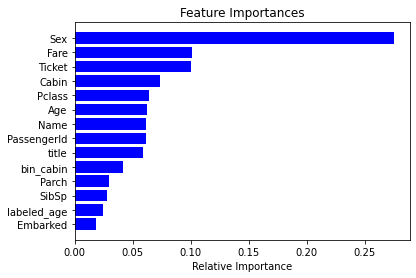

In [76]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),[col[i] for i in indices ])
plt.xlabel('Relative Importance')
plt.show()

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt_search=DecisionTreeClassifier(random_state=42)
param_grid_tree = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
             }

In [82]:
g_search_dt=GridSearchCV(estimator=dt_search,param_grid=param_grid_tree,cv=5)
g_search_dt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [83]:
print(g_search_dt.best_estimator_)

DecisionTreeClassifier(max_depth=7, random_state=42)


In [84]:
dt=DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [85]:
y_pred_dt=dt.predict(x_test)

In [86]:
accuracy  = metrics.accuracy_score(y_test,y_pred_dt)

recall = metrics.recall_score(y_test,y_pred_dt)

precision = metrics.precision_score(y_test,y_pred_dt)

f1_score = metrics.f1_score(y_test,y_pred_dt)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )
#Model Accuracy = 77.1 %
#Model recall = 73.1 %
#Model precision = 68.1 %
#Model f1_score = 70.5 %

Model Accuracy = 81.0 %
Model recall = 71.6 %
Model precision = 76.2 %
Model f1_score = 73.8 %


In [87]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.76      0.72      0.74        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



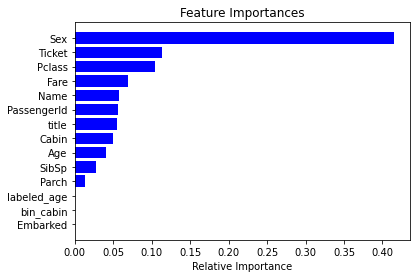

In [88]:
import matplotlib.pyplot as plt

importances = dt.feature_importances_

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),[col[i] for i in indices ])
plt.xlabel('Relative Importance')
plt.show()

[[97 15]
 [19 48]]


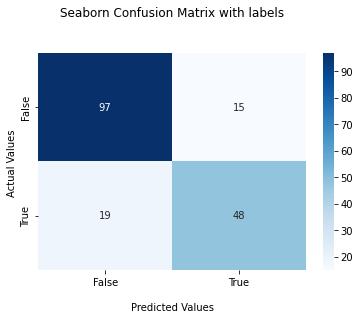

In [89]:
cf_matrix_dt = confusion_matrix(y_test,y_pred_dt)


print(cf_matrix_dt)

import seaborn as sns

ax = sns.heatmap(cf_matrix_dt, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

[Text(0.5, 1.0, 'DecisionTreeClassifier')]

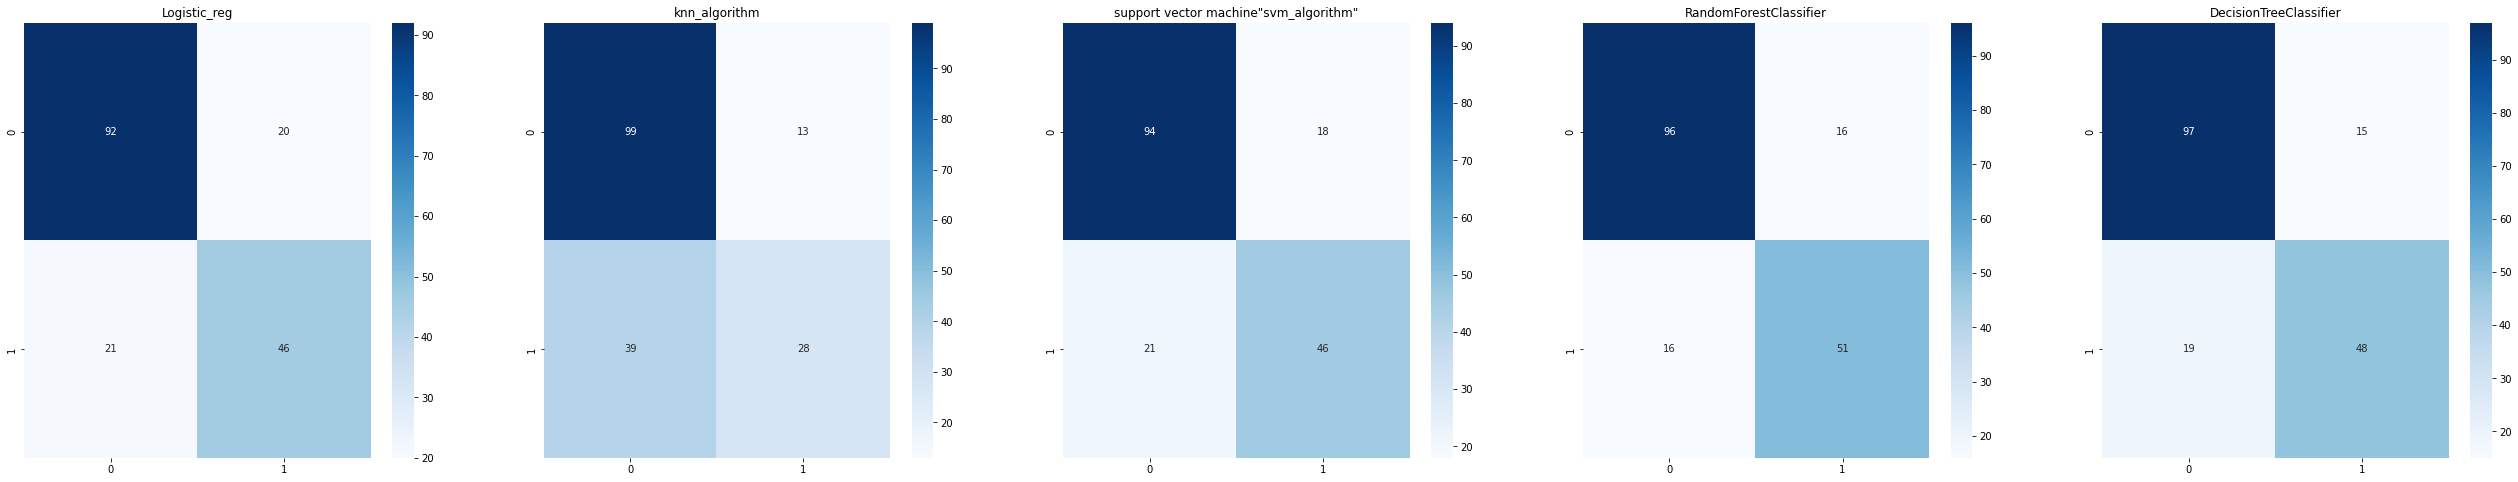

In [129]:
fig,ax=plt.subplots(1,5,figsize=(45,8))
sns.heatmap(cf_matrix_log, annot=True,ax=ax[0], cmap='Blues').set(title='Logistic_reg')
sns.heatmap(cf_matrix_knn, annot=True,ax=ax[1], cmap='Blues').set(title='knn_algorithm')
sns.heatmap(cf_matrix_svm, annot=True,ax=ax[2], cmap='Blues').set(title='support vector machine"svm_algorithm"')
sns.heatmap(cf_matrix_rf, annot=True,ax=ax[3], cmap='Blues').set(title='RandomForestClassifier')
sns.heatmap(cf_matrix_dt, annot=True,ax=ax[4], cmap='Blues').set(title='DecisionTreeClassifier')

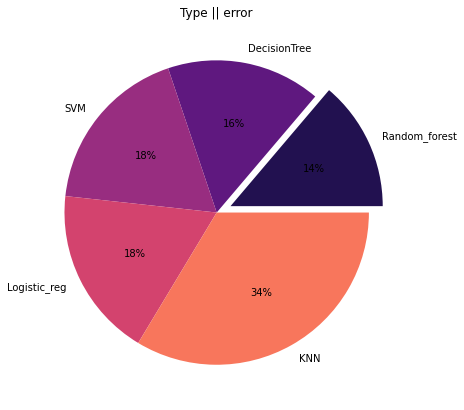

In [141]:
plt.figure(figsize=(15,7))
False_negative=[16,19,21,21,39]
models=['Random_forest','DecisionTree','SVM','Logistic_reg','KNN']
explode=[0.1,0,0,0,0]
palette_color=sns.color_palette('magma')
plt.pie(False_negative,labels=models,colors=palette_color,explode=explode,autopct='%.0f%%')
plt.title('Type || error')
plt.show()
#Random forest has the lowest type 2 error

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


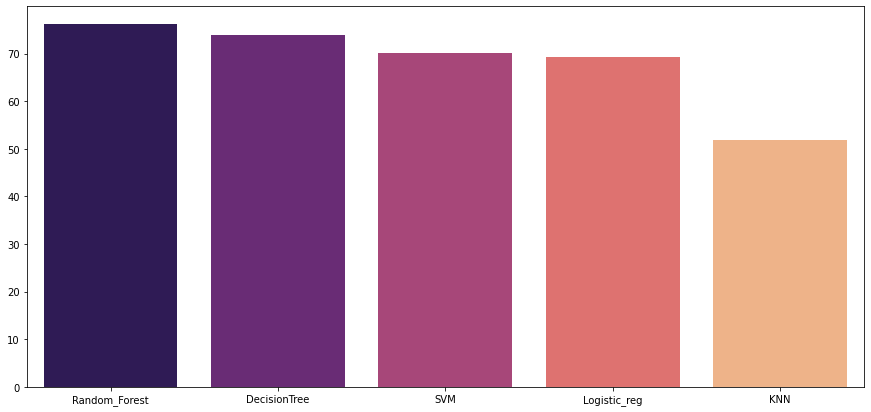

In [174]:
plt.figure(figsize=(15,7))
data1={'Random_Forest':76.1,'DecisionTree':73.8,'SVM':70.2,'Logistic_reg':69.2,'KNN':51.9}
sns.barplot(list(data1.keys()),list(data1.values()),palette='magma',order=list(data1.values()).sort())
plt.show()
#RandomForest has the highest f1_score